In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

%matplotlib inline

In [3]:
from load_data import load_weibo
data = load_weibo()
y_idx = torch.nonzero(data.y==1).reshape(-1)
E = data.edge_index
y = data.y
x = data.x
data

Data(x=[8405, 400], edge_index=[2, 407963], y=[8405], str_y=[8405], attr_y=[8405])

In [33]:
import torch_geometric.utils as U
choose = 24
nodes,edges,node_map,_ = utils.k_hop_subgraph(y_idx[choose].item(),2,data.edge_index,relabel_nodes=True)

mask = (nodes == y_idx[choose]).numpy().tolist()
color = ['green' if data.y[node_id].item() == 0 else 'red' for node_id in nodes.tolist()]

import torch.nn.functional as F
row,col = edges
sub_x = data.x[nodes]

edge_weight = F.cosine_similarity(sub_x[row], sub_x[col])

edge_width = ((edge_weight - torch.min(edge_weight)) * 2 + 0.1).detach().cpu().numpy().tolist()
EL = edges.numpy().T.tolist()
EL = [tuple(item) for item in EL]

edge_weight.shape

torch.Size([10451])

In [32]:
import igraph as ig
g = ig.Graph()

g.add_vertices(nodes.shape[0])
g.add_edges(EL)

g.vs["color"] = color
g.vs['color']


print('this is a subgraph of the Weibo dataset')
ig.plot(g,edge_width=edge_width,vertex_size=10)
# plt.savefig('./fig/weibo-sub.svg')

this is a subgraph of the Weibo dataset


In [22]:
print('homophily score:',U.homophily(E,y,method ='edge_insensitive'))

pred = U.degree(E[1])
print('degree score:',roc_auc_score(data.y.detach().numpy(),pred))

degree score: 0.5880215972935974


In [45]:
print('variance of outliers, variance of inliers')
torch.mean(torch.var(x[y==1],dim=0)).item(), torch.mean(torch.var(x[y==0],dim=0)).item()

variance of outliers, variance of inliers


(425.0025634765625, 11.953668594360352)

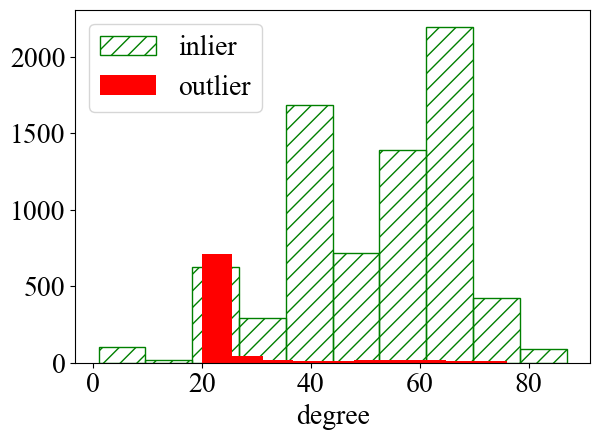

In [28]:
import torch_geometric.utils as U
deg = U.degree(data.edge_index[0]).detach().cpu().numpy()

import matplotlib.pyplot as plt
plt.rc('font',family='Times New Roman',size=20)
plt.hist(deg[data.y==0],color='navy',fill=False,hatch='//',edgecolor='green')
plt.hist(deg[data.y==1],color='red')
plt.xlabel('degree')
plt.tight_layout()
plt.legend(['inlier','outlier'])

需要的数据，var(y=0),var(y=1),L2-norm_auc,deg_auc,var_auc,homophily 
[模型]all_auc,str_auc,attr_auc

两张图，一张 是异常节点和正常节点分离的图， 第二张是deg的分布图，

测试一下AnomalyDAE的各项分数